# Exploratory Data Analysis

In any project of data analytics, we start with an important task called exploratory data analysis (EDA), i.e., using transformation, summarization, and visualisation to explore our data in a systematic way, often in an iterative cycle. 

In EDA, you:
- Ask some interesting questions about your data.
- Search for answers by visualising, transforming, and modeling your data.
- Use what you learn to refine your questions and/or generate new questions.

EDA is more than a formal process with a strict set of rules. Instead, think EDA as a state of mind. Initially, feel free to explore different ideas. Some ideas may be dead ends while some may lead to key insights.

## Goal: to develop an understanding of your data. 

EDA is fundamentally a creative process. And like most creative processes, the key to asking quality questions is to generate a large amount of questions. Answering these questions can help you know what insights are contained in your dataset, expose you to new aspects, and increase your chance of making a discovery. 

There is no rule about which questions you should ask to guide your research. However, two types of questions will always be useful for making discoveries within your data. You can loosely word these questions as:

1. What type of variation occurs within my variables?
2. What type of covariation occurs between my variables?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn') 

import seaborn as sns

In [2]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
diamonds.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


## Variation

Variation is the tendency of the values of a variable to change from measurement to measurement. You can see variation easily in real life. The best way to understand that pattern is to visualize the distribution of the variable’s values.

### Visualizing Distribution 

How you visualise the distribution of a variable will depend on whether the variable is categorical or continuous. 

- Categorical variable: Use a bar chart.

In [5]:
diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

<AxesSubplot:>

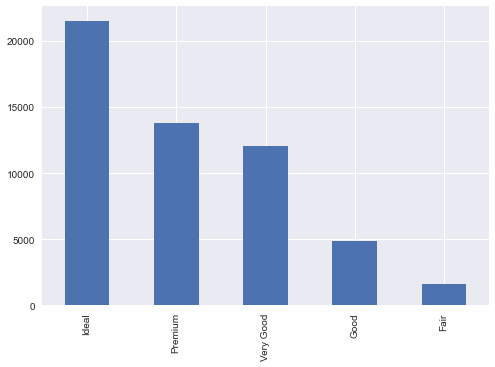

In [6]:
diamonds.cut.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='cut', ylabel='count'>

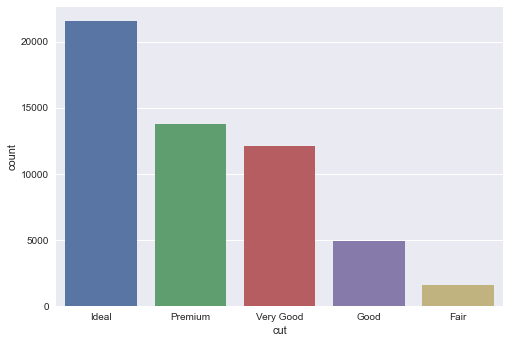

In [7]:
sns.countplot(data=diamonds, x='cut')

- Continuous variable: Use a histogram. 

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

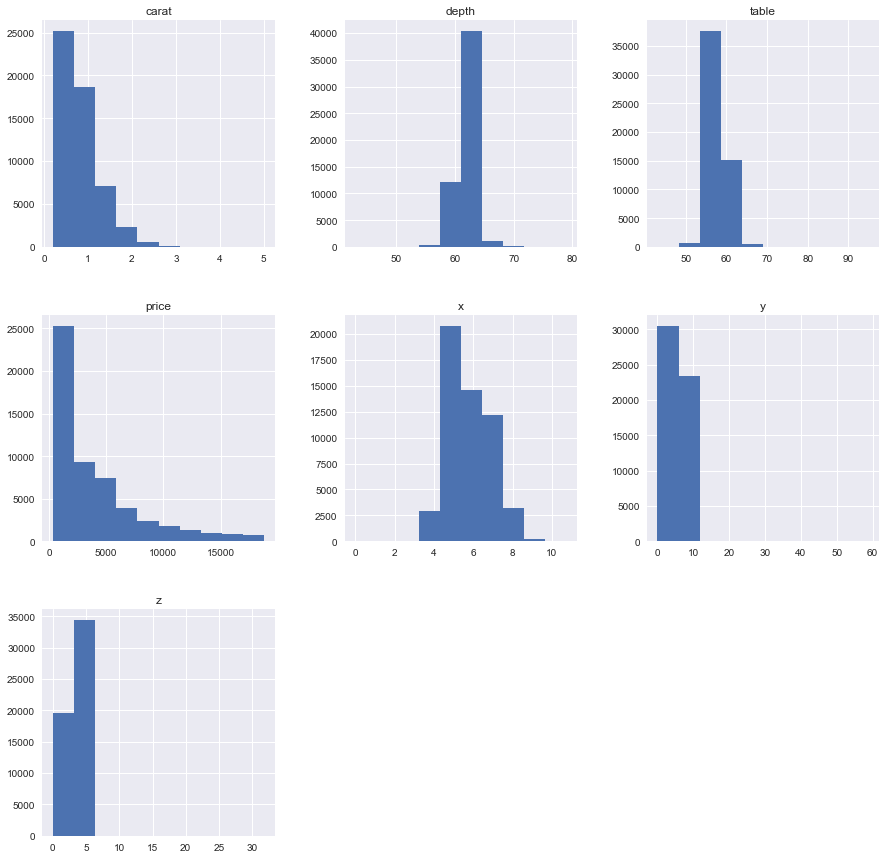

In [8]:
# histograms for all numerical features
diamonds.hist(figsize=(15,15))

<AxesSubplot:>

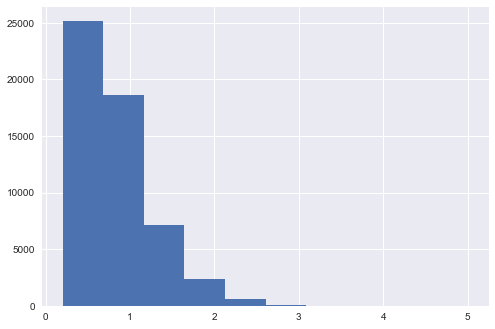

In [9]:
diamonds['carat'].hist()

<AxesSubplot:>

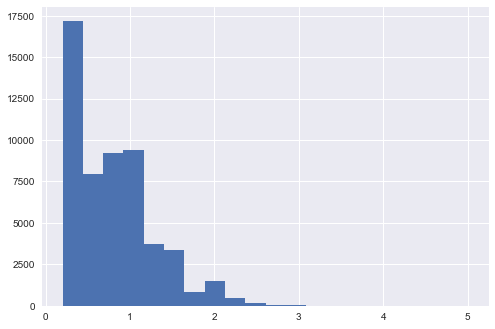

In [10]:
# Specify the number of bins (default=10)
diamonds['carat'].hist(bins=20)

<AxesSubplot:>

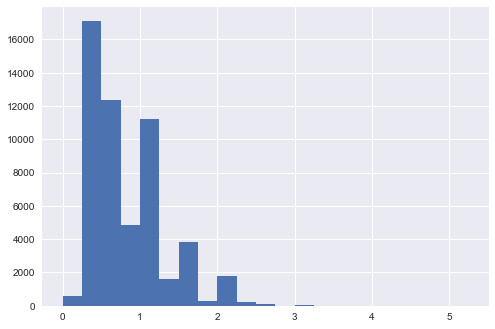

In [11]:
# Specify the bin width
binwidth = 0.25
diamonds['carat'].hist(bins=np.arange(0, diamonds['carat'].max()+binwidth, binwidth))

<AxesSubplot:>

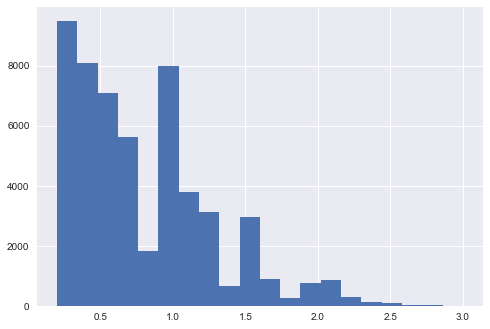

In [12]:
# To zoom in on diamonds of carat<=3
diamonds[diamonds.carat<=3]['carat'].hist(bins=20)

The Seaborn package has a variety of methods for visualizaing distributions of data: 

https://seaborn.pydata.org/tutorial/distributions.html

<AxesSubplot:xlabel='carat', ylabel='Count'>

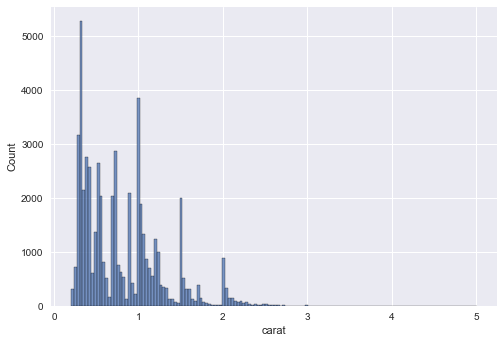

In [13]:
sns.histplot(diamonds, x='carat')

<AxesSubplot:xlabel='carat', ylabel='Probability'>

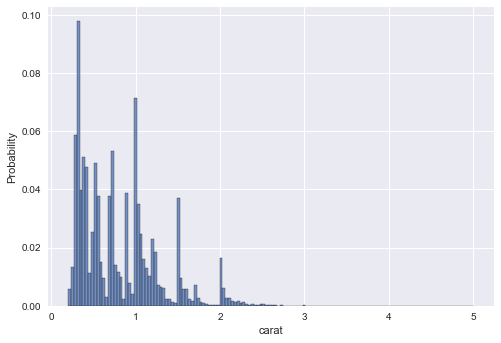

In [14]:
sns.histplot(diamonds, x='carat', stat='probability')

### Typical values

In both bar charts and histograms, tall bars show the common values of a variable, and shorter bars show less-common values. Places that do not have bars reveal values that were not seen in your data. To turn this information into useful questions, look for anything unexpected:
- Which values are the most common? Why?
- Which values are rare? Why? Does that match your expectations?
- Can you see any unusual patterns? What might explain them?

### Unusual values

Outliers are observations that are unusual; data points that don’t seem to fit the pattern. Sometimes outliers are data entry errors; other times outliers suggest important new science. When you have a lot of data, outliers are sometimes difficult to see in a histogram. For example, take the distribution of the y variable from the diamonds dataset. 

<AxesSubplot:>

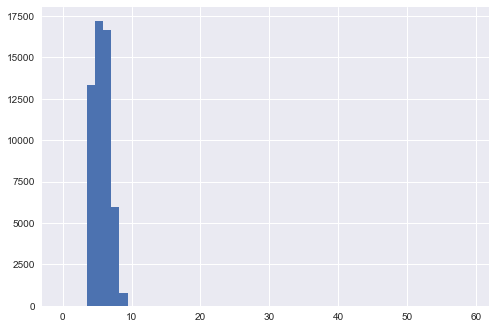

In [15]:
diamonds['y'].hist(bins=50)
# Look how wide the limits on the x-axis are. 

(0.0, 20.0)

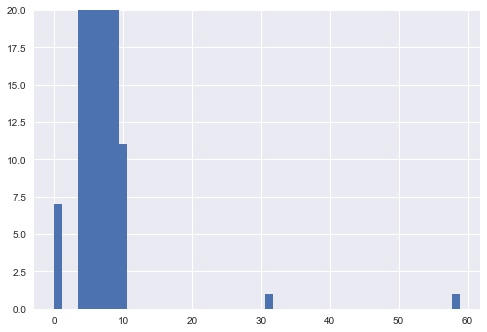

In [16]:
# Let's zoom in find where the outliers are. 
ax = diamonds['y'].hist(bins=50)
ax.set_ylim(ymin=0, ymax = 20)

In [17]:
# The chart above allows us to see that there are three unusual values: 0, ~30, and ~60. 
# Let's pluck them out. 
diamonds[(diamonds.y<3)|(diamonds.y>20)][['x','y','z']].sort_values('y')

# The y variable measures one of the three dimensions of these diamonds, in mm. 
# Diamonds can’t have a width of 0mm, so these values must be incorrect. 
# Measurements of 32mm and 59mm are implausible. Over an inch long!!!

,x,y,z
11963,0.00,0.0,0.00
15951,0.00,0.0,0.00
24520,0.00,0.0,0.00
26243,0.00,0.0,0.00
27429,0.00,0.0,0.00
49556,0.00,0.0,0.00
49557,0.00,0.0,0.00
49189,5.15,31.8,5.12
24067,8.09,58.9,8.06


In [18]:
# To drop the rows with the unusual values:
diamonds2 = diamonds[(diamonds.y>=3)&(diamonds.y<=20)]
print(f'Row count in the original dataset: {diamonds.shape[0]}')
print(f'Row count in the new dataset:      {diamonds2.shape[0]}')

Row count in the original dataset: 53940
Row count in the new dataset:      53931


## Covariation

If variation describes the behavior within a variable, covariation describes the behavior between variables. 

Covariation is the tendency for the values of two or more variables to vary together in a related way. The best way to spot covariation is to visualise the relationship between two or more variables. 

### A categorical and a continuous variable

It’s common to want to explore the distribution of a continuous variable broken down by a categorical variable. 

<AxesSubplot:xlabel='price', ylabel='Count'>

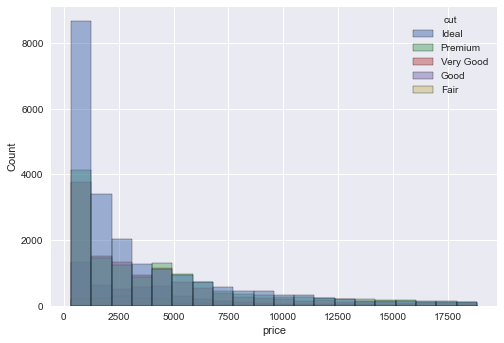

In [19]:
# How the price of a diamond varies with its cut. 
sns.histplot(diamonds, x="price", hue="cut",bins=20) 

<AxesSubplot:xlabel='price', ylabel='Count'>

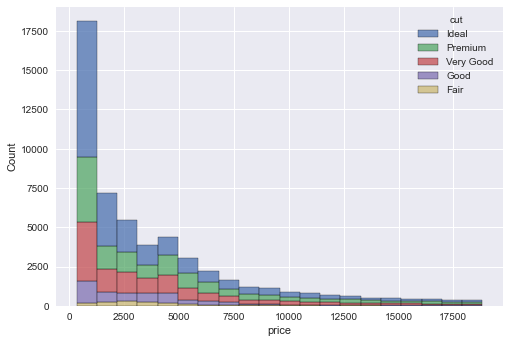

In [20]:
# The histogram above is not easy to see the differences between different cuts. 
# We can change the argument multiple to make it better. 

sns.histplot(diamonds, x="price", hue="cut",bins=20,multiple='stack') 

#sns.histplot(diamonds, x="price", hue="cut",bins=20,multiple='dodge') 

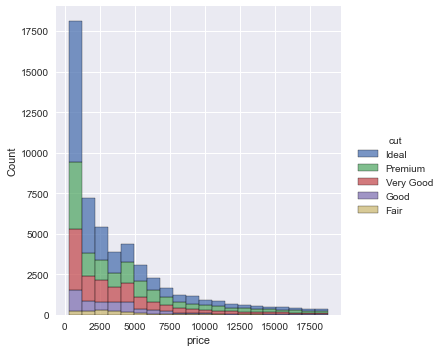

In [21]:
# You can use a displot() as well. 
sns.displot(diamonds, x="price", hue="cut",bins=20,multiple='stack') 

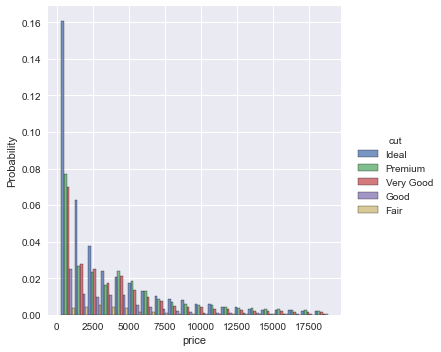

In [22]:
# Set stat='probability' to change the scale of y axis
sns.displot(diamonds, x="price", hue="cut",bins=20,multiple='dodge',stat='probability') 

These histrogams seem not that useful for comparison because the height is given by the count. That means if one of the groups is much smaller than the others, it’s hard to see the differences in shape, e.g., the "fair" cut in this dataset.

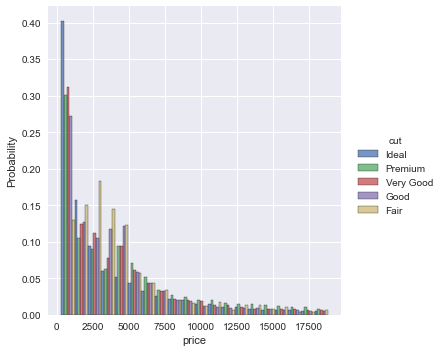

In [23]:
# By setting common_norm=False, each subset will be normalized independently:
sns.displot(diamonds, x="price", hue="cut",bins=20,multiple='dodge',stat='probability',common_norm=False) 

### KDE plot
A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate: 

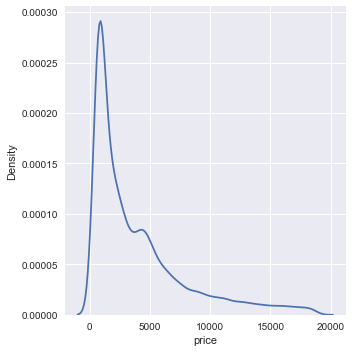

In [24]:
# Use a KDE plot to visualize the distribution of a continuous variable
sns.displot(diamonds, x="price", kind="kde") 

<AxesSubplot:xlabel='price', ylabel='Density'>

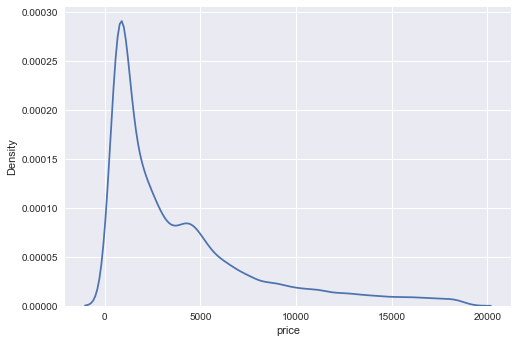

In [25]:
# You can use kedplot() as well
sns.kdeplot(data=diamonds, x="price")

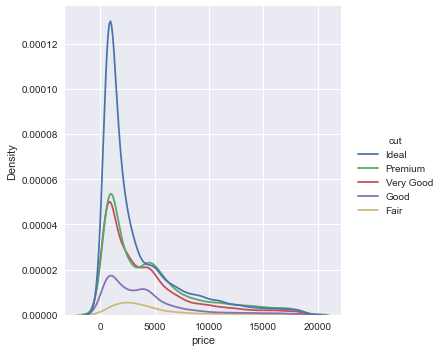

In [26]:
# Use a KDE plot to visualize the distributions of price for different cuts
sns.displot(diamonds, x="price", hue="cut", kind="kde") 

<AxesSubplot:xlabel='price', ylabel='Density'>

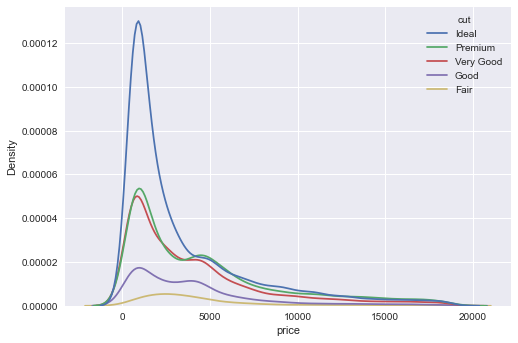

In [27]:
sns.kdeplot(data=diamonds, x="price", hue='cut')

Setting the argument ``common_norm``.
- If **common_norm=True**, scale each conditional density by the number of observations such that the total area under all densities sums to 1. 
- If **common_norm=False**, normalize each density independently such that the area under each density sums to 1.

<AxesSubplot:xlabel='price', ylabel='Density'>

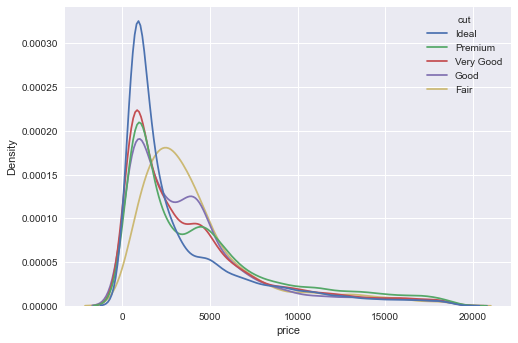

In [28]:
# Normalize density for groups: The area below each curve is 1. 

sns.kdeplot(data=diamonds, x="price", hue="cut", common_norm=False)
#sns.displot(diamonds, x="price", hue="cut", kind="kde", common_norm=False)

There’s something rather surprising about this plot - it appears that fair diamonds (the lowest quality) have the highest average price! 

### Boxplot

Another alternative to display the distribution of a continuous variable broken down by a categorical variable is the boxplot. A boxplot is a type of visual shorthand for a distribution of values that is popular among statisticians. Each boxplot consists of:

- A box that stretches from the 25th percentile of the distribution to the 75th percentile, a distance known as the interquartile range (IQR). In the middle of the box is a line that displays the median, i.e. 50th percentile, of the distribution. These three lines give you a sense of the spread of the distribution and whether or not the distribution is symmetric about the median or skewed to one side.
- Visual points that display observations that fall more than 1.5 times the IQR from either edge of the box. These outlying points are unusual so are plotted individually.
- A line (or whisker) that extends from each end of the box and goes to the farthest non-outlier point in the distribution.

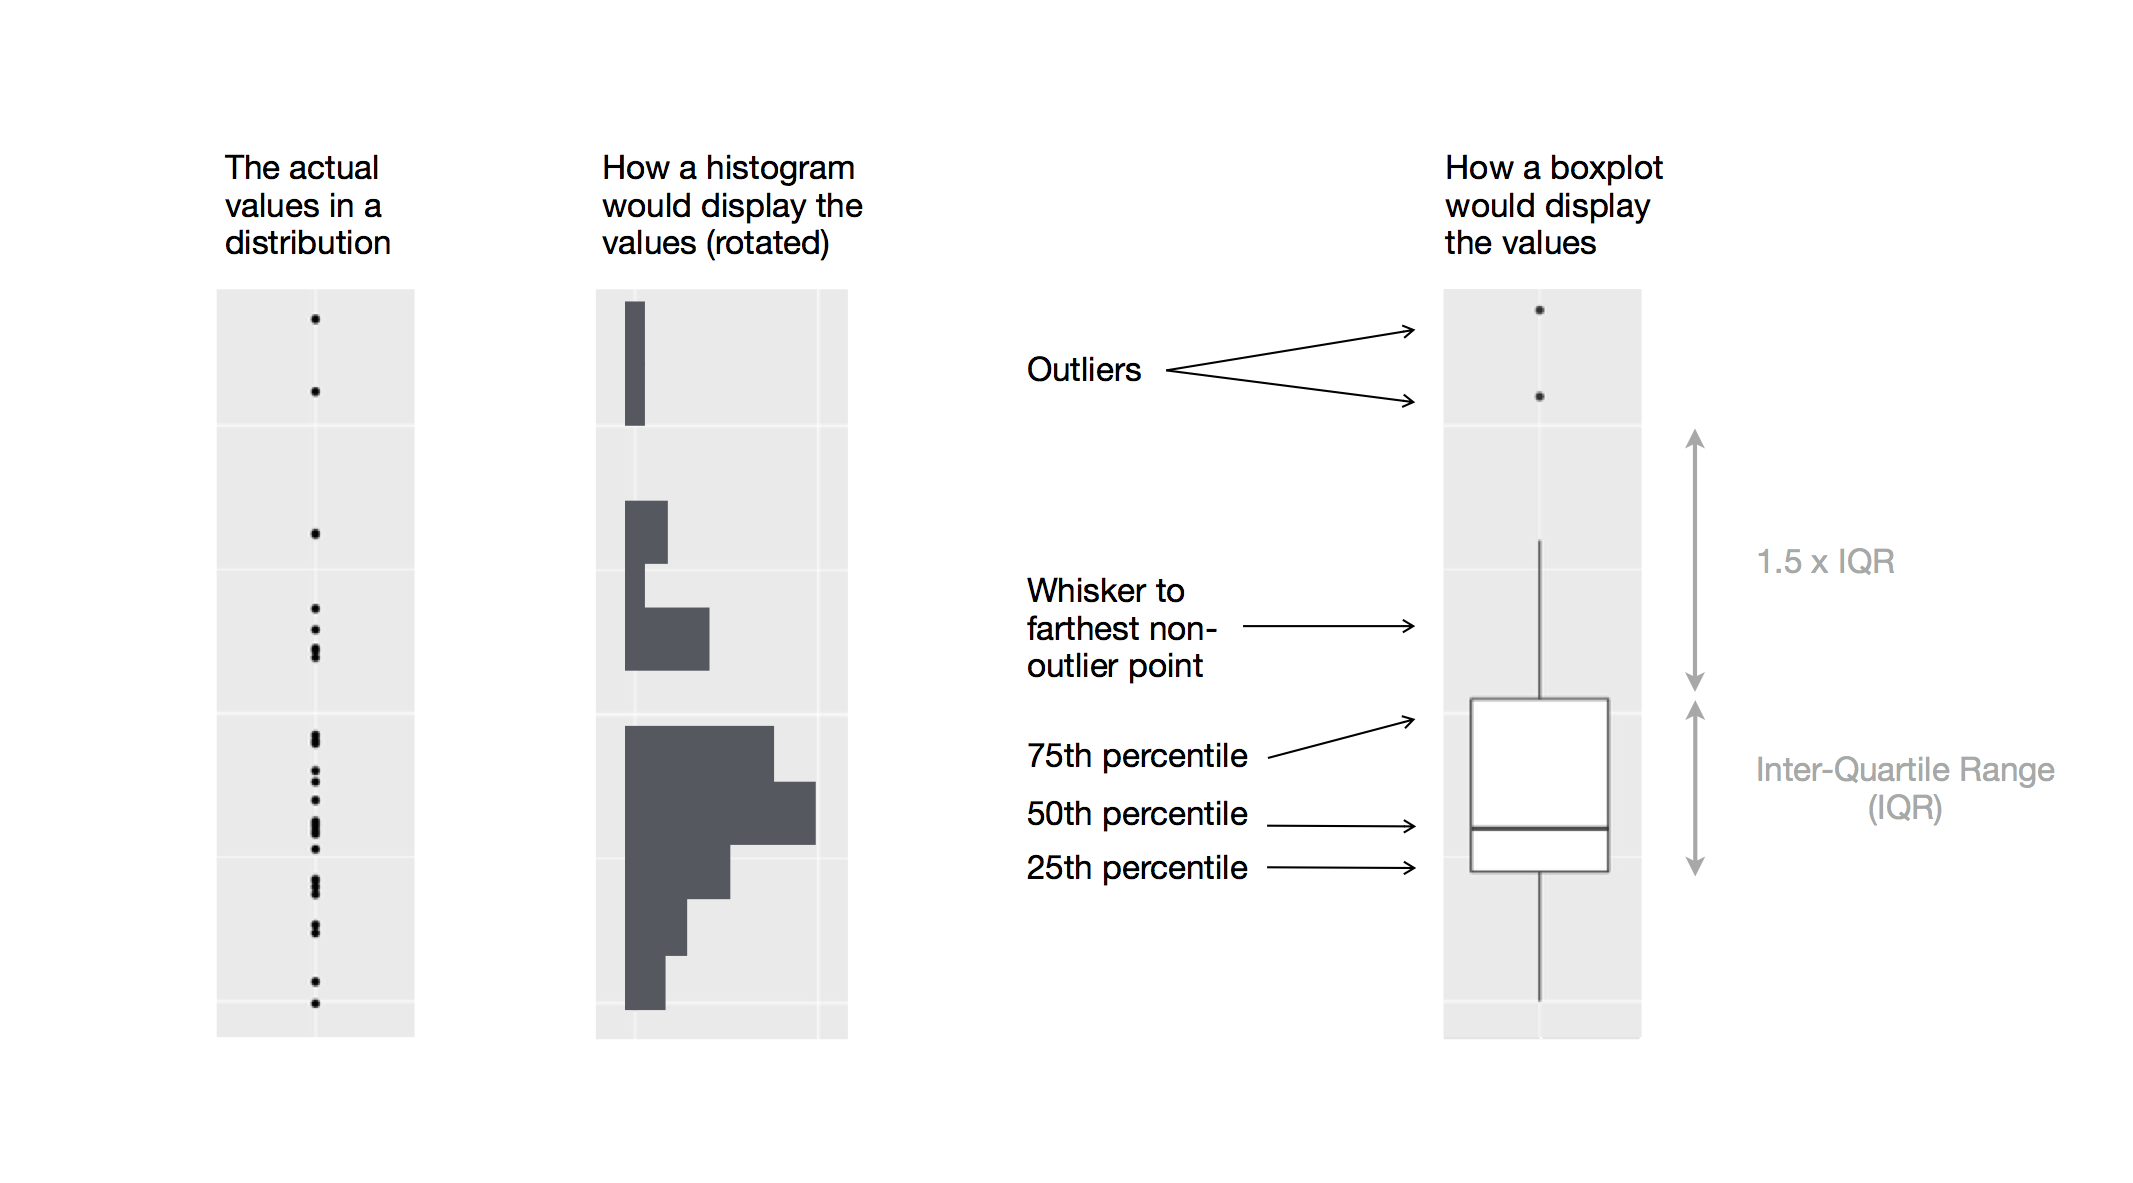

In [29]:
# how to display an image
from IPython.display import Image
Image('../img/eda-boxplot.png')

<AxesSubplot:>

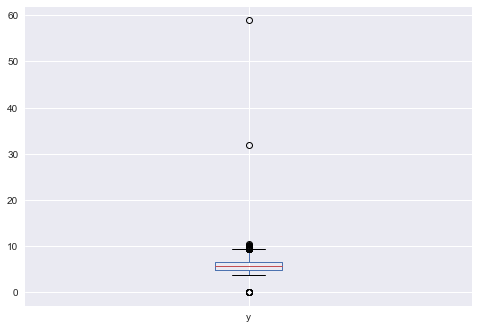

In [30]:
# We can use a boxplot to identify outliers for y. 
diamonds['y'].plot.box()

<AxesSubplot:>

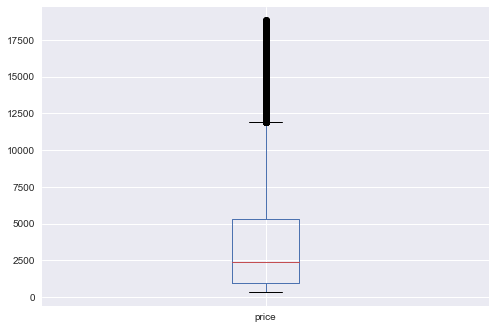

In [31]:
# Create a boxplot on price
diamonds['price'].plot.box()
#diamonds['price'].plot(kind='box')

<AxesSubplot:xlabel='cut', ylabel='price'>

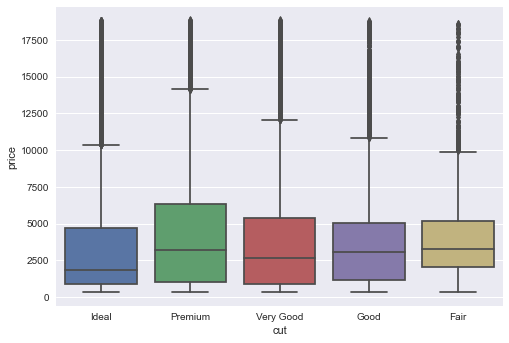

In [32]:
# Distribution of price by cut
sns.boxplot(data=diamonds, x='cut', y='price')

Compared to histograms, we see much less information about the distribution, but the boxplots are much more compact so we can more easily compare them (and fit more on one plot). It supports the counterintuitive finding that better quality diamonds are cheaper on average! 

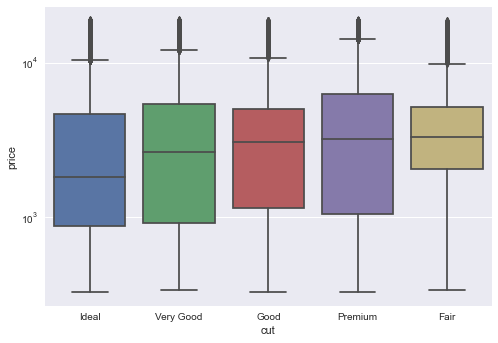

In [33]:
my_order = diamonds.groupby('cut')['price'].median().sort_values().index
ax = sns.boxplot(data=diamonds, x='cut', y='price', order=my_order)
ax.set_yscale("log") # Transform the y scale to log for easier comparison

### Two continuous variables

If you want to visualise the covariation between two continuous variables, draw a scatterplot. 

<AxesSubplot:xlabel='carat', ylabel='price'>

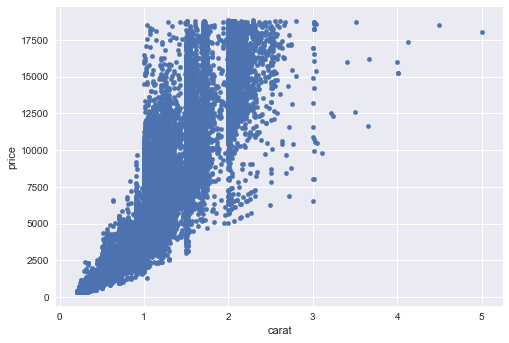

In [34]:
diamonds.plot(x='carat', y='price', kind='scatter')

<AxesSubplot:xlabel='carat', ylabel='price'>

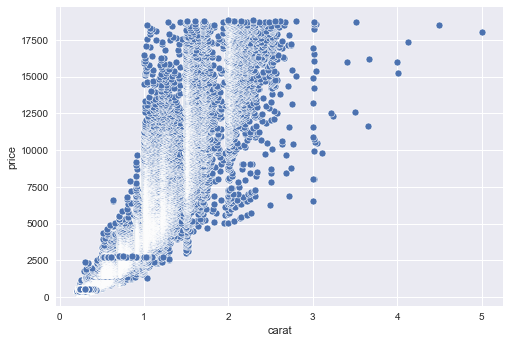

In [35]:
sns.scatterplot(data=diamonds,x='carat',y='price')

<AxesSubplot:xlabel='carat', ylabel='price'>

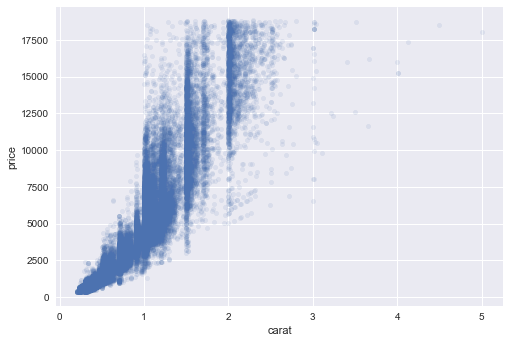

In [36]:
# Adjust alpha to add transparency
diamonds.plot(x='carat', y='price', kind='scatter', alpha=0.1)
#sns.scatterplot(data=diamonds,x='carat',y='price',alpha=0.1)

### Two categorical variables

To visualise the covariation between categorical variables, you’ll need to count the number of observations for each combination. 

In [37]:
dcc = diamonds.groupby(['cut','color'])['carat'].agg(['count'])
dcc

count
cut       color       
Ideal     D       2834
          E       3903
          F       3826
          G       4884
          H       3115
          I       2093
          J        896
Premium   D       1603
          E       2337
          F       2331
          G       2924
          H       2360
          I       1428
          J        808
Very Good D       1513
          E       2400
          F       2164
          G       2299
          H       1824
          I       1204
          J        678
Good      D        662
          E        933
          F        909
          G        871
          H        702
          I        522
          J        307
Fair      D        163
          E        224
          F        312
          G        314
          H        303
          I        175
          J        119

<AxesSubplot:xlabel='cut', ylabel='color'>

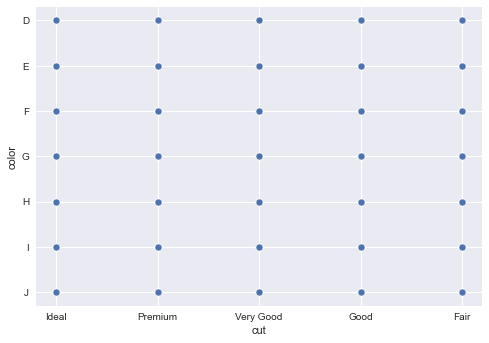

In [38]:
# Simply using a scatterplot may not show the pattern. 
sns.scatterplot(data=diamonds, x='cut', y='color')

<AxesSubplot:xlabel='cut', ylabel='color'>

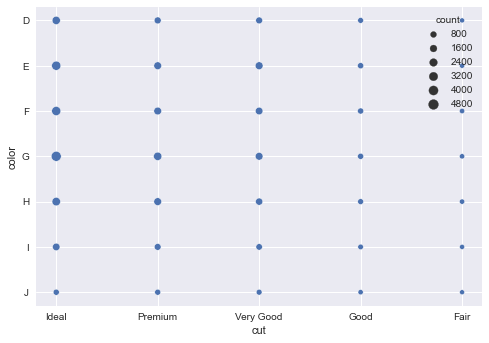

In [39]:
# The size of each circle in the plot displays how many observations occurred at each combination of values. 
sns.scatterplot(data=dcc, x='cut', y='color', size='count')

In [40]:
# Create pivot table. 
dpt = diamonds.pivot_table(values=['carat'], index=['cut'], columns=['color'], aggfunc=np.size)
dpt

carat                                               
color           D       E       F       G       H       I      J
cut                                                             
Ideal      2834.0  3903.0  3826.0  4884.0  3115.0  2093.0  896.0
Premium    1603.0  2337.0  2331.0  2924.0  2360.0  1428.0  808.0
Very Good  1513.0  2400.0  2164.0  2299.0  1824.0  1204.0  678.0
Good        662.0   933.0   909.0   871.0   702.0   522.0  307.0
Fair        163.0   224.0   312.0   314.0   303.0   175.0  119.0

<AxesSubplot:xlabel='None-color', ylabel='cut'>

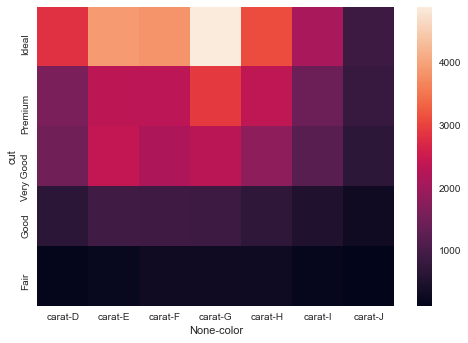

In [41]:
# Create a heatmap
sns.heatmap(data=dpt)